# Feature selection 

### On Nutrition Facts for McDonald's Menu

Author: Nutan Mandale

Mentor: Vincent Ramdhanie

Date: 2017/03/28

### Data Description:

This dataset provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts.

McDonald's is one example of popular fast food joint. With this data set I am trying to explore the nutritional facts of the food served there as well as different features that can be used to find the effect of food served there on human health.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [391]:
#import csv
menu = pd.read_csv("./menu.csv")

In [392]:
menu.rename(columns={'Serving Size': 'Servingsize','Calories from Fat': 'CaloriesfromFat','Total Fat': 'TotalFat','Total Fat (% Daily Value)': 'TotalFat%DailyValue','Saturated Fat': 'SaturatedFat','Saturated Fat (% Daily Value)': 'SaturateFat%DailyValue','Trans Fat': 'TransFat','Cholesterol (% Daily Value)': 'Cholesterol%DailyValue','Dietary Fiber': 'DietaryFiber','Dietary Fiber (% Daily Value)': 'DietaryFiber%DailyValue','Vitamin A (% Daily Value)': 'VitaminA%DailyValue','Carbohydrates (% Daily Value)': 'Carbohydrates%DailyValue','Sodium (% Daily Value)': 'Sodium%DailyValue','Vitamin C (% Daily Value)': 'VitaminC%DailyValue','Calcium (% Daily Value)': 'Calcium%DailyValue','Iron (% Daily Value)' : 'Iron%DailyValue'}, inplace =True)

In [393]:
menu.head()

Category                              Item     Servingsize  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   CaloriesfromFat  TotalFat  TotalFat%DailyValue  SaturatedFat  \
0              120      13.0                   20           5.0   
1               70       8.0                   12           3.0   
2              200      23.0                   35           8.0   
3              250      28.0                   43          10.0   
4              210      23.0                   35           8.0   

   SaturateFat%DailyValue  TransFat       ...         Carbohydrates  \
0                      25       0.0       ...                    31   
1                      15       0.0       ...                    30   
2                      42       0.0       ...                    29   
3                      52       0.0       ...                    30   
4                      42       0.0       ...                    30   

   Carbohydrates%DailyValue  DietaryFiber  DietaryFiber%DailyValue  Sugars  \
0                        10             4                       17       3   
1                        10             4                       17       3   
2                        10             4                       17       2   
3                        10             4                       17       2   
4                        10             4                       17       2   

   Protein  VitaminA%DailyValue  VitaminC%DailyValue  Calcium%DailyValue  \
0       17                   10                    0                  25   
1       18                    6                    0                  25   
2       14                    8                    0                  25   
3       21                   15                    0                  30   
4       21                    6                    0                  25   

   Iron%DailyValue  
0               15  
1                8  
2               10  
3               15  
4               10  

[5 rows x 24 columns]

In [394]:
# Check for Nulls
print(menu.isnull().any())

Category                    False
Item                        False
Servingsize                 False
Calories                    False
CaloriesfromFat             False
TotalFat                    False
TotalFat%DailyValue         False
SaturatedFat                False
SaturateFat%DailyValue      False
TransFat                    False
Cholesterol                 False
Cholesterol%DailyValue      False
Sodium                      False
Sodium%DailyValue           False
Carbohydrates               False
Carbohydrates%DailyValue    False
DietaryFiber                False
DietaryFiber%DailyValue     False
Sugars                      False
Protein                     False
VitaminA%DailyValue         False
VitaminC%DailyValue         False
Calcium%DailyValue          False
Iron%DailyValue             False
dtype: bool


In [395]:
#data set rows and columns
menu.shape

(260, 24)

In [396]:
menu.head()

Category                              Item     Servingsize  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   CaloriesfromFat  TotalFat  TotalFat%DailyValue  SaturatedFat  \
0              120      13.0                   20           5.0   
1               70       8.0                   12           3.0   
2              200      23.0                   35           8.0   
3              250      28.0                   43          10.0   
4              210      23.0                   35           8.0   

   SaturateFat%DailyValue  TransFat       ...         Carbohydrates  \
0                      25       0.0       ...                    31   
1                      15       0.0       ...                    30   
2                      42       0.0       ...                    29   
3                      52       0.0       ...                    30   
4                      42       0.0       ...                    30   

   Carbohydrates%DailyValue  DietaryFiber  DietaryFiber%DailyValue  Sugars  \
0                        10             4                       17       3   
1                        10             4                       17       3   
2                        10             4                       17       2   
3                        10             4                       17       2   
4                        10             4                       17       2   

   Protein  VitaminA%DailyValue  VitaminC%DailyValue  Calcium%DailyValue  \
0       17                   10                    0                  25   
1       18                    6                    0                  25   
2       14                    8                    0                  25   
3       21                   15                    0                  30   
4       21                    6                    0                  25   

   Iron%DailyValue  
0               15  
1                8  
2               10  
3               15  
4               10  

[5 rows x 24 columns]

## Categorical Variable

In [397]:
#List unique values in the df['name'] column
menu.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In this dataset we have 2 categorical variables Category and Item

In [398]:
drinksdf = menu[(menu.Category == 'Coffee & Tea') | (menu.Category == 'Beverages')| (menu.Category == 'Smoothies & Shakes')]

In [399]:
drinksdf.shape

(150, 24)

In [400]:
drinksdf.head()

Category                        Item   Servingsize  Calories  \
110  Beverages   Coca-Cola Classic (Small)  16 fl oz cup       140   
111  Beverages  Coca-Cola Classic (Medium)  21 fl oz cup       200   
112  Beverages   Coca-Cola Classic (Large)  30 fl oz cup       280   
113  Beverages   Coca-Cola Classic (Child)  12 fl oz cup       100   
114  Beverages           Diet Coke (Small)  16 fl oz cup         0   

     CaloriesfromFat  TotalFat  TotalFat%DailyValue  SaturatedFat  \
110                0       0.0                    0           0.0   
111                0       0.0                    0           0.0   
112                0       0.0                    0           0.0   
113                0       0.0                    0           0.0   
114                0       0.0                    0           0.0   

     SaturateFat%DailyValue  TransFat       ...         Carbohydrates  \
110                       0       0.0       ...                    39   
111                       0       0.0       ...                    55   
112                       0       0.0       ...                    76   
113                       0       0.0       ...                    28   
114                       0       0.0       ...                     0   

     Carbohydrates%DailyValue  DietaryFiber  DietaryFiber%DailyValue  Sugars  \
110                        13             0                        0      39   
111                        18             0                        0      55   
112                        25             0                        0      76   
113                         9             0                        0      28   
114                         0             0                        0       0   

     Protein  VitaminA%DailyValue  VitaminC%DailyValue  Calcium%DailyValue  \
110        0                    0                    0                   0   
111        0                    0                    0                   0   
112        0                    0                    0                   0   
113        0                    0                    0                   0   
114        0                    0                    0                   0   

     Iron%DailyValue  
110                0  
111                0  
112                0  
113                0  
114                0  

[5 rows x 24 columns]

In [401]:
eatsdf =menu[-((menu.Category == 'Coffee & Tea') | (menu.Category == 'Beverages')| (menu.Category == 'Smoothies & Shakes'))]

In [402]:
eatsdf.head()

Category                              Item     Servingsize  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   CaloriesfromFat  TotalFat  TotalFat%DailyValue  SaturatedFat  \
0              120      13.0                   20           5.0   
1               70       8.0                   12           3.0   
2              200      23.0                   35           8.0   
3              250      28.0                   43          10.0   
4              210      23.0                   35           8.0   

   SaturateFat%DailyValue  TransFat       ...         Carbohydrates  \
0                      25       0.0       ...                    31   
1                      15       0.0       ...                    30   
2                      42       0.0       ...                    29   
3                      52       0.0       ...                    30   
4                      42       0.0       ...                    30   

   Carbohydrates%DailyValue  DietaryFiber  DietaryFiber%DailyValue  Sugars  \
0                        10             4                       17       3   
1                        10             4                       17       3   
2                        10             4                       17       2   
3                        10             4                       17       2   
4                        10             4                       17       2   

   Protein  VitaminA%DailyValue  VitaminC%DailyValue  Calcium%DailyValue  \
0       17                   10                    0                  25   
1       18                    6                    0                  25   
2       14                    8                    0                  25   
3       21                   15                    0                  30   
4       21                    6                    0                  25   

   Iron%DailyValue  
0               15  
1                8  
2               10  
3               15  
4               10  

[5 rows x 24 columns]

In [403]:
eatsdf.shape

(110, 24)

In [404]:
print(pd.crosstab(menu.Item, [menu.Category], rownames=['Item'], colnames=['Category']))

Category                                            Beef & Pork  Beverages  \
Item                                                                         
1% Low Fat Milk Jug                                           0          1   
Apple Slices                                                  0          0   
Bacon Buffalo Ranch McChicken                                 0          0   
Bacon Cheddar McChicken                                       0          0   
Bacon Clubhouse Burger                                        1          0   
Bacon Clubhouse Crispy Chicken Sandwich                       0          0   
Bacon Clubhouse Grilled Chicken Sandwich                      0          0   
Bacon McDouble                                                1          0   
Bacon, Egg & Cheese Bagel                                     0          0   
Bacon, Egg & Cheese Bagel with Egg Whites                     0          0   
Bacon, Egg & Cheese Biscuit (Large Biscuit)                   0 

In [405]:
eatsdf.columns

Index(['Category', 'Item', 'Servingsize', 'Calories', 'CaloriesfromFat',
       'TotalFat', 'TotalFat%DailyValue', 'SaturatedFat',
       'SaturateFat%DailyValue', 'TransFat', 'Cholesterol',
       'Cholesterol%DailyValue', 'Sodium', 'Sodium%DailyValue',
       'Carbohydrates', 'Carbohydrates%DailyValue', 'DietaryFiber',
       'DietaryFiber%DailyValue', 'Sugars', 'Protein', 'VitaminA%DailyValue',
       'VitaminC%DailyValue', 'Calcium%DailyValue', 'Iron%DailyValue'],
      dtype='object')

In [406]:
drinksdf.columns

Index(['Category', 'Item', 'Servingsize', 'Calories', 'CaloriesfromFat',
       'TotalFat', 'TotalFat%DailyValue', 'SaturatedFat',
       'SaturateFat%DailyValue', 'TransFat', 'Cholesterol',
       'Cholesterol%DailyValue', 'Sodium', 'Sodium%DailyValue',
       'Carbohydrates', 'Carbohydrates%DailyValue', 'DietaryFiber',
       'DietaryFiber%DailyValue', 'Sugars', 'Protein', 'VitaminA%DailyValue',
       'VitaminC%DailyValue', 'Calcium%DailyValue', 'Iron%DailyValue'],
      dtype='object')

In [407]:
import re
def servesize(Servingsize):
    s_s = re.findall('\d+ g',Servingsize)
    if len(s_s) > 0:
        return s_s[0]
    else:
        return 0

In [408]:
import re
def drinksize(Servingsize):
    d_s = re.findall('\d+ fl oz cup',Servingsize)
    if len(d_s) > 0:
        return d_s[0]
    else:
        return 0

In [409]:
#eatsdf = pd.DataFrame({'Servingsize': eatsdf['Servingsize'].apply(servesize)})
eatsdf['Servingsize'] = eatsdf['Servingsize'].apply(servesize)

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [410]:
eatsdf.tail()

Category                   Item Servingsize  Calories  CaloriesfromFat  \
105  Desserts  Oatmeal Raisin Cookie        33 g       150               50   
106  Desserts    Kids Ice Cream Cone        29 g        45               10   
107  Desserts       Hot Fudge Sundae       179 g       330               80   
108  Desserts     Hot Caramel Sundae       182 g       340               70   
109  Desserts      Strawberry Sundae       178 g       280               60   

     TotalFat  TotalFat%DailyValue  SaturatedFat  SaturateFat%DailyValue  \
105       6.0                    9           2.5                      13   
106       1.5                    2           1.0                       4   
107       9.0                   14           7.0                      34   
108       8.0                   12           5.0                      24   
109       6.0                   10           4.0                      20   

     TransFat       ...         Carbohydrates  Carbohydrates%DailyValue  \
105       0.0       ...                    22                         7   
106       0.0       ...                     7                         2   
107       0.0       ...                    53                        18   
108       0.0       ...                    60                        20   
109       0.0       ...                    49                        16   

     DietaryFiber  DietaryFiber%DailyValue  Sugars  Protein  \
105             1                        3      13        2   
106             0                        0       6        1   
107             1                        3      48        8   
108             0                        0      43        7   
109             0                        0      45        6   

     VitaminA%DailyValue  VitaminC%DailyValue  Calcium%DailyValue  \
105                    2                    0                   2   
106                    2                    0                   4   
107                    8                    0                  25   
108                   10                    0                  25   
109                    8                    4                  20   

     Iron%DailyValue  
105                6  
106                0  
107                8  
108                0  
109                0  

[5 rows x 24 columns]

In [411]:
drinksdf['Servingsize'] = drinksdf['Servingsize'].apply(drinksize)

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [390]:
drinksdf[['Item','Servingsize']]

Item   Servingsize
110                          Coca-Cola Classic (Small)  16 fl oz cup
111                         Coca-Cola Classic (Medium)  21 fl oz cup
112                          Coca-Cola Classic (Large)  30 fl oz cup
113                          Coca-Cola Classic (Child)  12 fl oz cup
114                                  Diet Coke (Small)  16 fl oz cup
115                                 Diet Coke (Medium)  21 fl oz cup
116                                  Diet Coke (Large)  30 fl oz cup
117                                  Diet Coke (Child)  12 fl oz cup
118                                  Dr Pepper (Small)  16 fl oz cup
119                                 Dr Pepper (Medium)  21 fl oz cup
120                                  Dr Pepper (Large)  30 fl oz cup
121                                  Dr Pepper (Child)  12 fl oz cup
122                             Diet Dr Pepper (Small)  16 fl oz cup
123                            Diet Dr Pepper (Medium)  21 fl oz cup
124                             Diet Dr Pepper (Large)  30 fl oz cup
125                             Diet Dr Pepper (Child)  12 fl oz cup
126                                     Sprite (Small)  16 fl oz cup
127                                    Sprite (Medium)  21 fl oz cup
128                                     Sprite (Large)  30 fl oz cup
129                                     Sprite (Child)  12 fl oz cup
130                                1% Low Fat Milk Jug             0
131                        Fat Free Chocolate Milk Jug             0
132                   Minute Maid 100% Apple Juice Box             0
133                   Minute Maid Orange Juice (Small)  12 fl oz cup
134                  Minute Maid Orange Juice (Medium)  16 fl oz cup
135                   Minute Maid Orange Juice (Large)  22 fl oz cup
136                                Dasani Water Bottle             0
137                                   Iced Tea (Small)  16 fl oz cup
138                                  Iced Tea (Medium)  21 fl oz cup
139                                   Iced Tea (Large)  30 fl oz cup
..                                                 ...           ...
230                     Frappé Chocolate Chip (Medium)  16 fl oz cup
231                      Frappé Chocolate Chip (Large)  22 fl oz cup
232             Blueberry Pomegranate Smoothie (Small)  12 fl oz cup
233            Blueberry Pomegranate Smoothie (Medium)  16 fl oz cup
234             Blueberry Pomegranate Smoothie (Large)  22 fl oz cup
235                 Strawberry Banana Smoothie (Small)  12 fl oz cup
236                Strawberry Banana Smoothie (Medium)  16 fl oz cup
237                 Strawberry Banana Smoothie (Large)  22 fl oz cup
238                   Mango Pineapple Smoothie (Small)  12 fl oz cup
239                  Mango Pineapple Smoothie (Medium)  16 fl oz cup
240                   Mango Pineapple Smoothie (Large)  22 fl oz cup
241                              Vanilla Shake (Small)  12 fl oz cup
242                             Vanilla Shake (Medium)  16 fl oz cup
243                              Vanilla Shake (Large)  22 fl oz cup
244                           Strawberry Shake (Small)  12 fl oz cup
245                          Strawberry Shake (Medium)  16 fl oz cup
246                           Strawberry Shake (Large)  22 fl oz cup
247                            Chocolate Shake (Small)  12 fl oz cup
248                           Chocolate Shake (Medium)  16 fl oz cup
249                            Chocolate Shake (Large)  22 fl oz cup
250                            Shamrock Shake (Medium)  16 fl oz cup
251                             Shamrock Shake (Large)  22 fl oz cup
252                McFlurry with M&M’s Candies (Small)             0
253               McFlurry with M&M’s Candies (Medium)             0
254                McFlurry with M&M’s Candies (Snack)             0
255                 McFlurry with Oreo Cookies (Small)             0
256                McFlurry with Oreo Cookies (M

In [346]:
drinksdf.tail()

Category                                               Item  \
255  Smoothies & Shakes                 McFlurry with Oreo Cookies (Small)   
256  Smoothies & Shakes                McFlurry with Oreo Cookies (Medium)   
257  Smoothies & Shakes                 McFlurry with Oreo Cookies (Snack)   
258  Smoothies & Shakes  McFlurry with Reese's Peanut Butter Cups (Medium)   
259  Smoothies & Shakes   McFlurry with Reese's Peanut Butter Cups (Snack)   

    Servingsize  Calories  CaloriesfromFat  TotalFat  TotalFat%DailyValue  \
255           0       510              150      17.0                   26   
256           0       690              200      23.0                   35   
257           0       340              100      11.0                   17   
258           0       810              290      32.0                   50   
259           0       410              150      16.0                   25   

     SaturatedFat  SaturateFat%DailyValue  TransFat       ...         \
255           9.0                      44       0.5       ...          
256          12.0                      58       1.0       ...          
257           6.0                      29       0.0       ...          
258          15.0                      76       1.0       ...          
259           8.0                      38       0.0       ...          

     Carbohydrates  Carbohydrates%DailyValue  DietaryFiber  \
255             80                        27             1   
256            106                        35             1   
257             53                        18             1   
258            114                        38             2   
259             57                        19             1   

     DietaryFiber%DailyValue  Sugars  Protein  VitaminA%DailyValue  \
255                        4      64       12                   15   
256                        5      85       15                   20   
257                        2      43        8                   10   
258                        9     103       21                   20   
259                        5      51       10                   10   

     VitaminC%DailyValue  Calcium%DailyValue  Iron%DailyValue  
255                    0                  40                8  
256                    0                  50               10  
257                    0                  25                6  
258                    0                  60                6  
259                    0                  30                4  

[5 rows x 24 columns]

In [414]:
eatsdf.Servingsize = eatsdf.Servingsize.apply(lambda x: float(x[:-1]))

C:\Users\NutanMandale\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [415]:
eatsdf.head()

Category                              Item  Servingsize  Calories  \
0  Breakfast                      Egg McMuffin        136.0       300   
1  Breakfast                 Egg White Delight        135.0       250   
2  Breakfast                  Sausage McMuffin        111.0       370   
3  Breakfast         Sausage McMuffin with Egg        161.0       450   
4  Breakfast  Sausage McMuffin with Egg Whites        161.0       400   

   CaloriesfromFat  TotalFat  TotalFat%DailyValue  SaturatedFat  \
0              120      13.0                   20           5.0   
1               70       8.0                   12           3.0   
2              200      23.0                   35           8.0   
3              250      28.0                   43          10.0   
4              210      23.0                   35           8.0   

   SaturateFat%DailyValue  TransFat       ...         Carbohydrates  \
0                      25       0.0       ...                    31   
1                      15       0.0       ...                    30   
2                      42       0.0       ...                    29   
3                      52       0.0       ...                    30   
4                      42       0.0       ...                    30   

   Carbohydrates%DailyValue  DietaryFiber  DietaryFiber%DailyValue  Sugars  \
0                        10             4                       17       3   
1                        10             4                       17       3   
2                        10             4                       17       2   
3                        10             4                       17       2   
4                        10             4                       17       2   

   Protein  VitaminA%DailyValue  VitaminC%DailyValue  Calcium%DailyValue  \
0       17                   10                    0                  25   
1       18                    6                    0                  25   
2       14                    8                    0                  25   
3       21                   15                    0                  30   
4       21                    6                    0                  25   

   Iron%DailyValue  
0               15  
1                8  
2               10  
3               15  
4               10  

[5 rows x 24 columns]

In [417]:
type(eatsdf.Servingsize)

pandas.core.series.Series

Here we have seperted items according to categories.

Let us consider each feature seperatly.

## Feature 1 -- Calories

Calories in food is supposed to be major cause of obesity. More the calorie intake per meal and less burning out of calories significantly increases chances of obesity in an individual

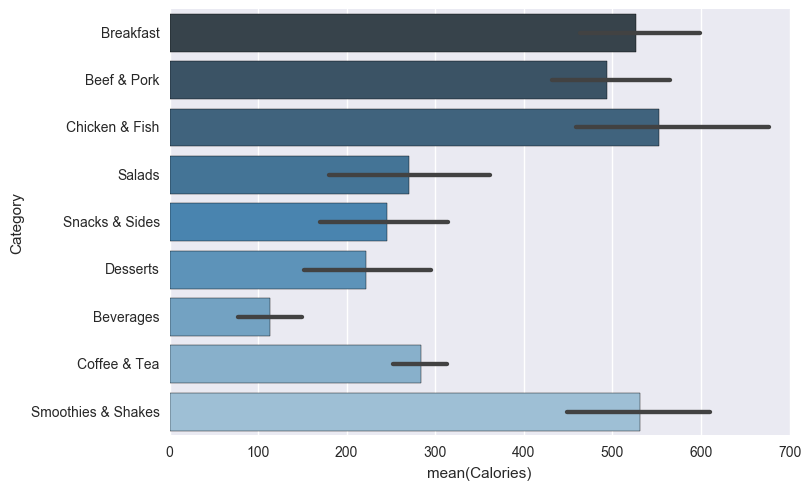

In [21]:
ax = sns.barplot(x="Calories", y="Category", data=menu, palette="Blues_d");

Here we see smothies and shakes have higher mean calories than that of desserts.

In [22]:
breakfast_df = menu[menu.Category == 'Breakfast']
beefpork_df = menu[menu.Category == 'Beef & Pork']
chi_fi_df = menu[menu.Category == 'Chicken & Fish']
salads_df = menu[menu.Category == 'Salads']
sn_si_df = menu[menu.Category == 'Snacks & Sides']
desserts_df = menu[menu.Category == 'Desserts']
beverages_df = menu[menu.Category == 'Beverages']
coffee_tea_df = menu[menu.Category == 'Coffee & Tea']
smoothies_shakes_df = menu[menu.Category == 'Smoothies & Shakes']

In [471]:
chi_fi_df.tail()

Category                          Item      Servingsize  Calories  \
79  Chicken & Fish   Chicken McNuggets (6 piece)    3.4 oz (97 g)       280   
80  Chicken & Fish  Chicken McNuggets (10 piece)   5.7 oz (162 g)       470   
81  Chicken & Fish  Chicken McNuggets (20 piece)  11.4 oz (323 g)       940   
82  Chicken & Fish  Chicken McNuggets (40 piece)  22.8 oz (646 g)      1880   
83  Chicken & Fish                  Filet-O-Fish     5 oz (142 g)       390   

    CaloriesfromFat  TotalFat  TotalFat%DailyValue  SaturatedFat  \
79              160      18.0                   27           3.0   
80              270      30.0                   45           5.0   
81              530      59.0                   91          10.0   
82             1060     118.0                  182          20.0   
83              170      19.0                   29           4.0   

    SaturateFat%DailyValue  TransFat       ...         Carbohydrates  \
79                      15       0.0       ...                    18   
80                      25       0.0       ...                    30   
81                      50       0.0       ...                    59   
82                     101       1.0       ...                   118   
83                      19       0.0       ...                    39   

    Carbohydrates%DailyValue  DietaryFiber  DietaryFiber%DailyValue  Sugars  \
79                         6             1                        4       0   
80                        10             2                        6       0   
81                        20             3                       12       0   
82                        39             6                       24       1   
83                        13             2                        7       5   

    Protein  VitaminA%DailyValue  VitaminC%DailyValue  Calcium%DailyValue  \
79       13                    0                    2                   2   
80       22                    0                    4                   2   
81       44                    0                    8                   4   
82       87                    0                   15                   8   
83       15                    2                    0                  15   

    Iron%DailyValue  
79                4  
80                6  
81               10  
82               25  
83               10  

[5 rows x 24 columns]

In [472]:
chifi_df = eatsdf[eatsdf.Category == 'Chicken & Fish']

In [476]:
print(chifi_df.isnull().any())

Category                    False
Item                        False
Servingsize                 False
Calories                    False
CaloriesfromFat             False
TotalFat                    False
TotalFat%DailyValue         False
SaturatedFat                False
SaturateFat%DailyValue      False
TransFat                    False
Cholesterol                 False
Cholesterol%DailyValue      False
Sodium                      False
Sodium%DailyValue           False
Carbohydrates               False
Carbohydrates%DailyValue    False
DietaryFiber                False
DietaryFiber%DailyValue     False
Sugars                      False
Protein                     False
VitaminA%DailyValue         False
VitaminC%DailyValue         False
Calcium%DailyValue          False
Iron%DailyValue             False
caloriespergm               False
fiberpergm                  False
cholestrolpergm             False
sugarpergm                  False
sodiumpergm                 False
proteinpergm  

In [475]:
chifi_df[['Item','Sugars','sugarpergm']]

Item  Sugars  sugarpergm
57            Premium Crispy Chicken Classic Sandwich      10   21.300000
58           Premium Grilled Chicken Classic Sandwich       8   25.000000
59               Premium Crispy Chicken Club Sandwich      11   22.636364
60              Premium Grilled Chicken Club Sandwich       9   26.111111
61          Premium Crispy Chicken Ranch BLT Sandwich      11   20.909091
62         Premium Grilled Chicken Ranch BLT Sandwich       9   24.111111
63            Bacon Clubhouse Crispy Chicken Sandwich      16   17.750000
64           Bacon Clubhouse Grilled Chicken Sandwich      14   19.285714
65             Southern Style Crispy Chicken Sandwich       7   22.857143
66                                          McChicken       5   28.600000
67                            Bacon Cheddar McChicken       6   28.500000
68                      Bacon Buffalo Ranch McChicken       6   26.833333
69                            Buffalo Ranch McChicken       5   29.600000
70    Premium McWrap Chicken & Bacon (Crispy Chicken)       7   45.142857
71   Premium McWrap Chicken & Bacon (Grilled Chicken)       6   50.333333
72    Premium McWrap Chicken & Ranch (Crispy Chicken)       8   38.750000
73   Premium McWrap Chicken & Ranch (Grilled Chicken)       6   49.500000
74  Premium McWrap Southwest Chicken (Crispy Chicken)      12   26.166667
75  Premium McWrap Southwest Chicken (Grilled Chic...      10   31.800000
76  Premium McWrap Chicken Sweet Chili (Crispy Chi...      14   21.714286
77  Premium McWrap Chicken Sweet Chili (Grilled Ch...      12   24.250000
78                        Chicken McNuggets (4 piece)       0         inf
79                        Chicken McNuggets (6 piece)       0         inf
80                       Chicken McNuggets (10 piece)       0         inf
81                       Chicken McNuggets (20 piece)       0         inf
82                       Chicken McNuggets (40 piece)       1  646.000000
83                                       Filet-O-Fish       5   28.400000

In [418]:
smoothies_shakes_df.head()

Category                                     Item  \
232  Smoothies & Shakes   Blueberry Pomegranate Smoothie (Small)   
233  Smoothies & Shakes  Blueberry Pomegranate Smoothie (Medium)   
234  Smoothies & Shakes   Blueberry Pomegranate Smoothie (Large)   
235  Smoothies & Shakes       Strawberry Banana Smoothie (Small)   
236  Smoothies & Shakes      Strawberry Banana Smoothie (Medium)   

      Servingsize  Calories  CaloriesfromFat  TotalFat  TotalFat%DailyValue  \
232  12 fl oz cup       220                5       0.5                    1   
233  16 fl oz cup       260                5       1.0                    1   
234  22 fl oz cup       340               10       1.0                    2   
235  12 fl oz cup       210                5       0.5                    1   
236  16 fl oz cup       250                5       1.0                    1   

     SaturatedFat  SaturateFat%DailyValue  TransFat       ...         \
232           0.0                       0       0.0       ...          
233           0.0                       0       0.0       ...          
234           0.5                       3       0.0       ...          
235           0.0                       0       0.0       ...          
236           0.0                       0       0.0       ...          

     Carbohydrates  Carbohydrates%DailyValue  DietaryFiber  \
232             50                        17             3   
233             62                        21             4   
234             79                        26             5   
235             47                        16             3   
236             58                        19             3   

     DietaryFiber%DailyValue  Sugars  Protein  VitaminA%DailyValue  \
232                       12      44        2                    0   
233                       15      54        3                    0   
234                       19      70        4                    0   
235                       10      44        3                    0   
236                       13      54        4                    0   

     VitaminC%DailyValue  Calcium%DailyValue  Iron%DailyValue  
232                    2                   6                2  
233                    4                   8                2  
234                    4                  10                2  
235                   30                   8                2  
236                   35                   8                4  

[5 rows x 24 columns]

### Calories in food served in McDonalds

The Calories vary by items but surprisingly we see desserts have less calories than smoothies & shakes so it is important to create a new feature of calories per gram of servings.

In [482]:
eatsdf['caloriespergm'] = eatsdf['Calories']/eatsdf['Servingsize']

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [483]:
eatsdf.columns

Index(['Category', 'Item', 'Servingsize', 'Calories', 'CaloriesfromFat',
       'TotalFat', 'TotalFat%DailyValue', 'SaturatedFat',
       'SaturateFat%DailyValue', 'TransFat', 'Cholesterol',
       'Cholesterol%DailyValue', 'Sodium', 'Sodium%DailyValue',
       'Carbohydrates', 'Carbohydrates%DailyValue', 'DietaryFiber',
       'DietaryFiber%DailyValue', 'Sugars', 'Protein', 'VitaminA%DailyValue',
       'VitaminC%DailyValue', 'Calcium%DailyValue', 'Iron%DailyValue',
       'caloriespergm', 'fiberpergm', 'cholestrolpergm', 'sugarpergm',
       'sodiumpergm', 'proteinpergm', 'carbohydratepergm'],
      dtype='object')

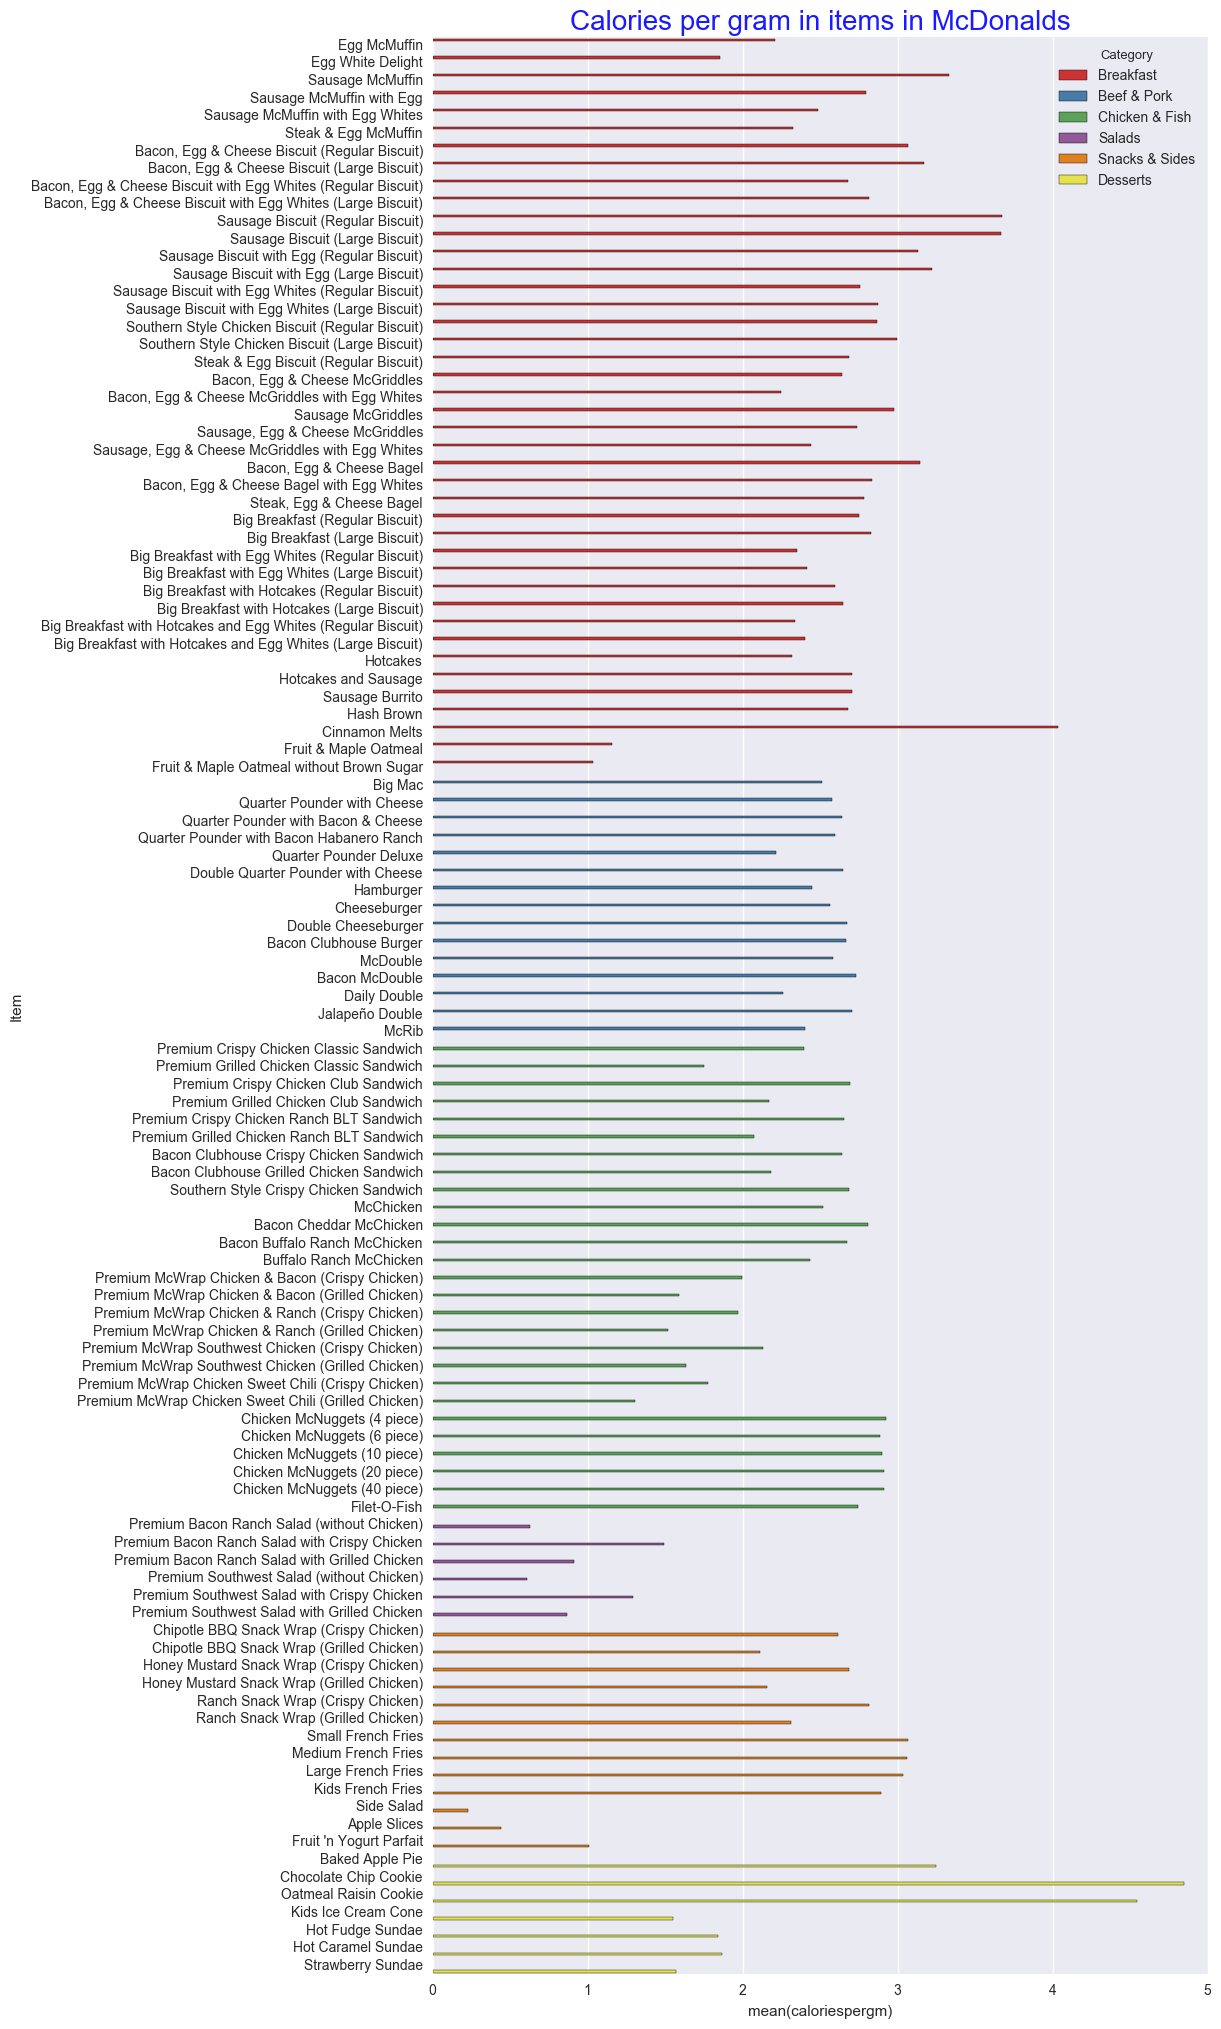

In [484]:
ax = sns.barplot(x="caloriespergm", 
                 y="Item", 
                 hue = 'Category',
                 data=eatsdf,                  
                 palette="Set1")
ax.figure.set_size_inches(10,25)
ax.axes.set_title('Calories per gram in items in McDonalds',
    fontsize=20,color="b",alpha=0.9);

### Calories per ml in drinks served in McDonalds

## Feature 2 -- Dietary Fiber  

In [485]:
eatsdf['fiberpergm'] = eatsdf['DietaryFiber']/eatsdf['Servingsize']

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


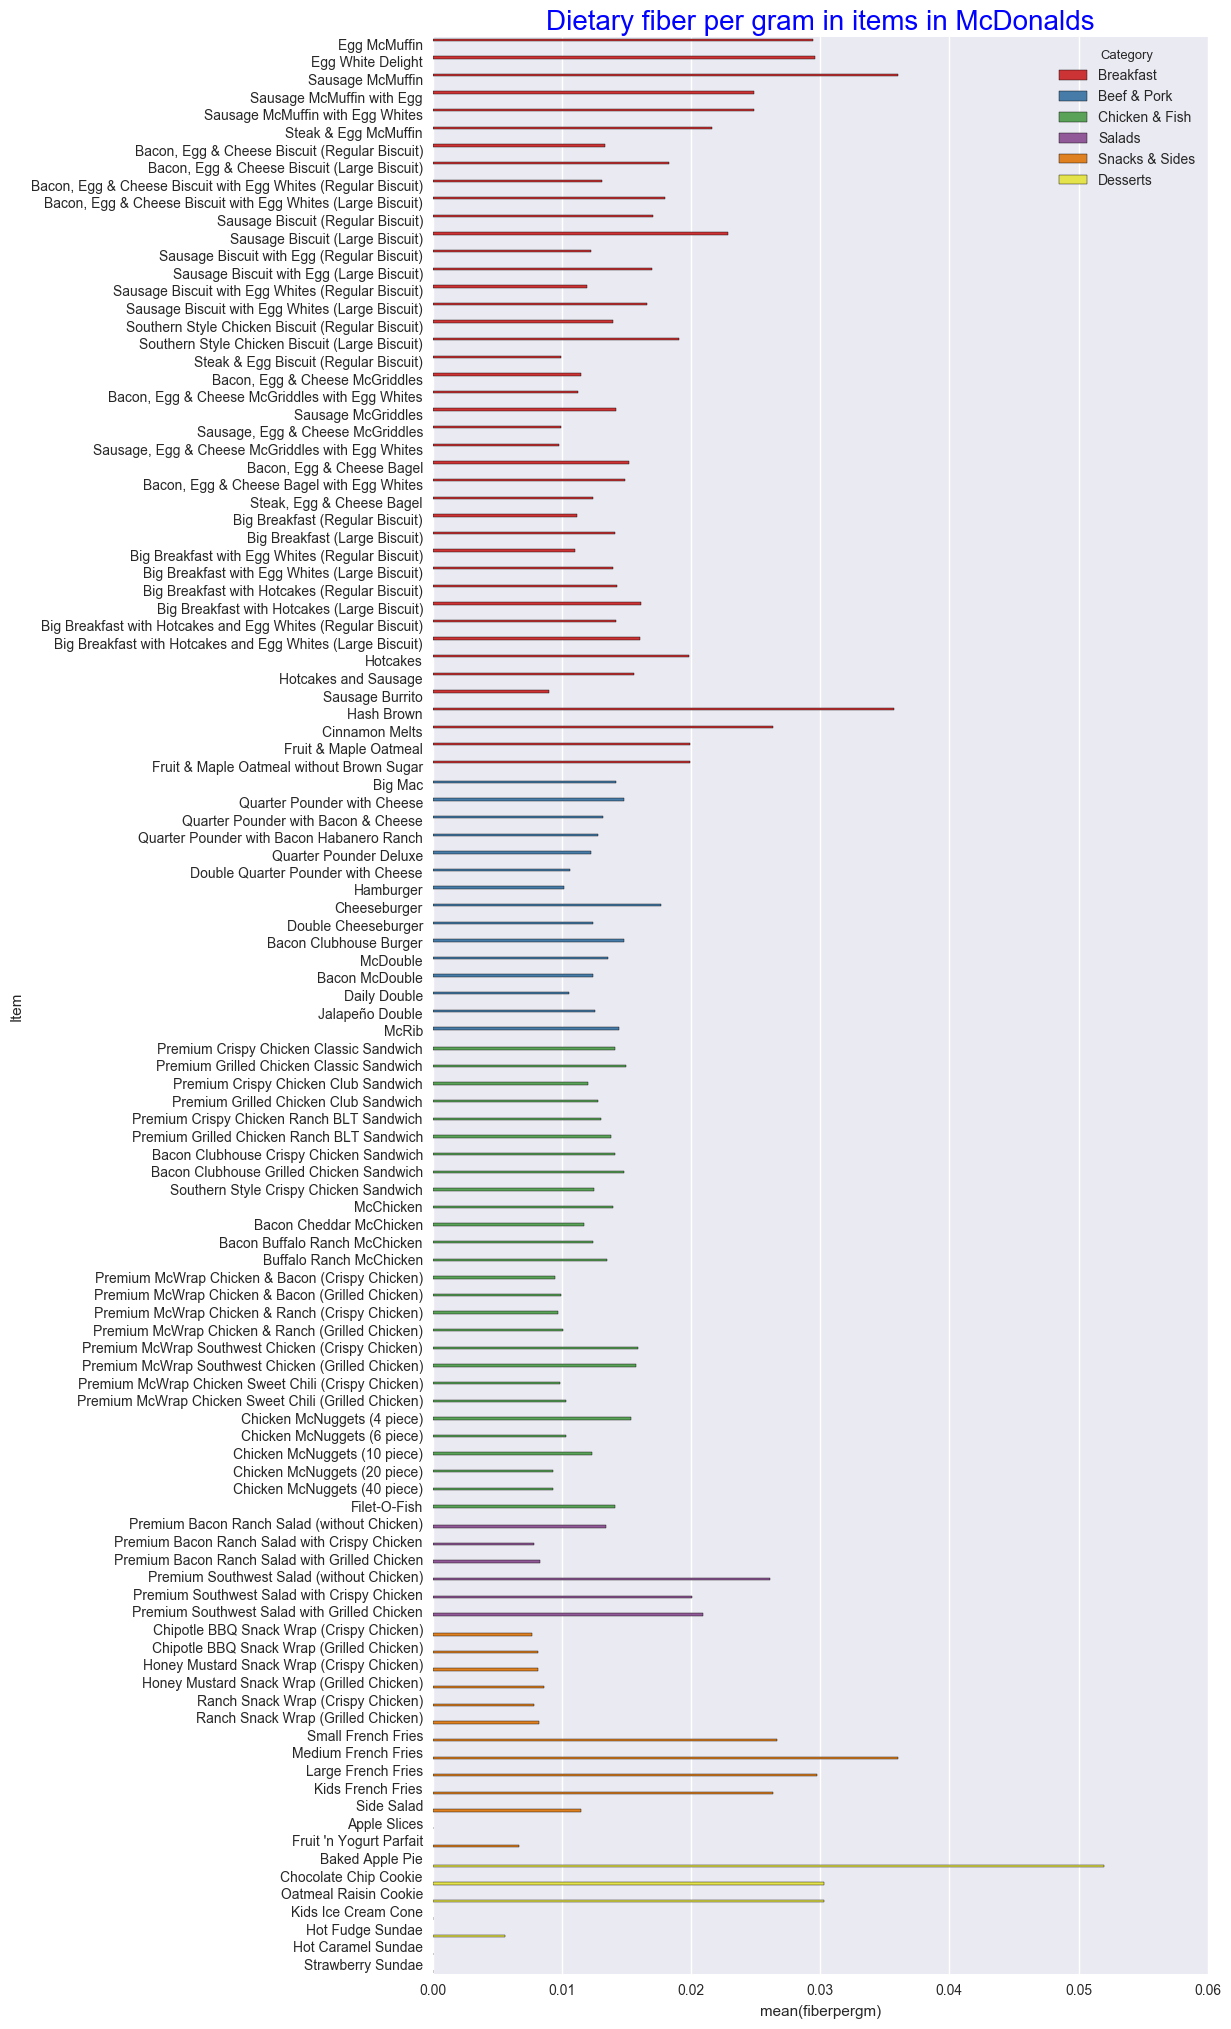

In [486]:
ax = sns.barplot(x="fiberpergm", 
                 y="Item", 
                 hue = 'Category',
                 data=eatsdf,                  
                 palette="Set1")
ax.figure.set_size_inches(10,25)
ax.axes.set_title('Dietary fiber per gram in items in McDonalds',
    fontsize=20,color="b",alpha=1);

## Feature 3 -- Cholestrol

In [487]:
eatsdf['cholestrolpergm'] = eatsdf['Cholesterol']/eatsdf['Servingsize']

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


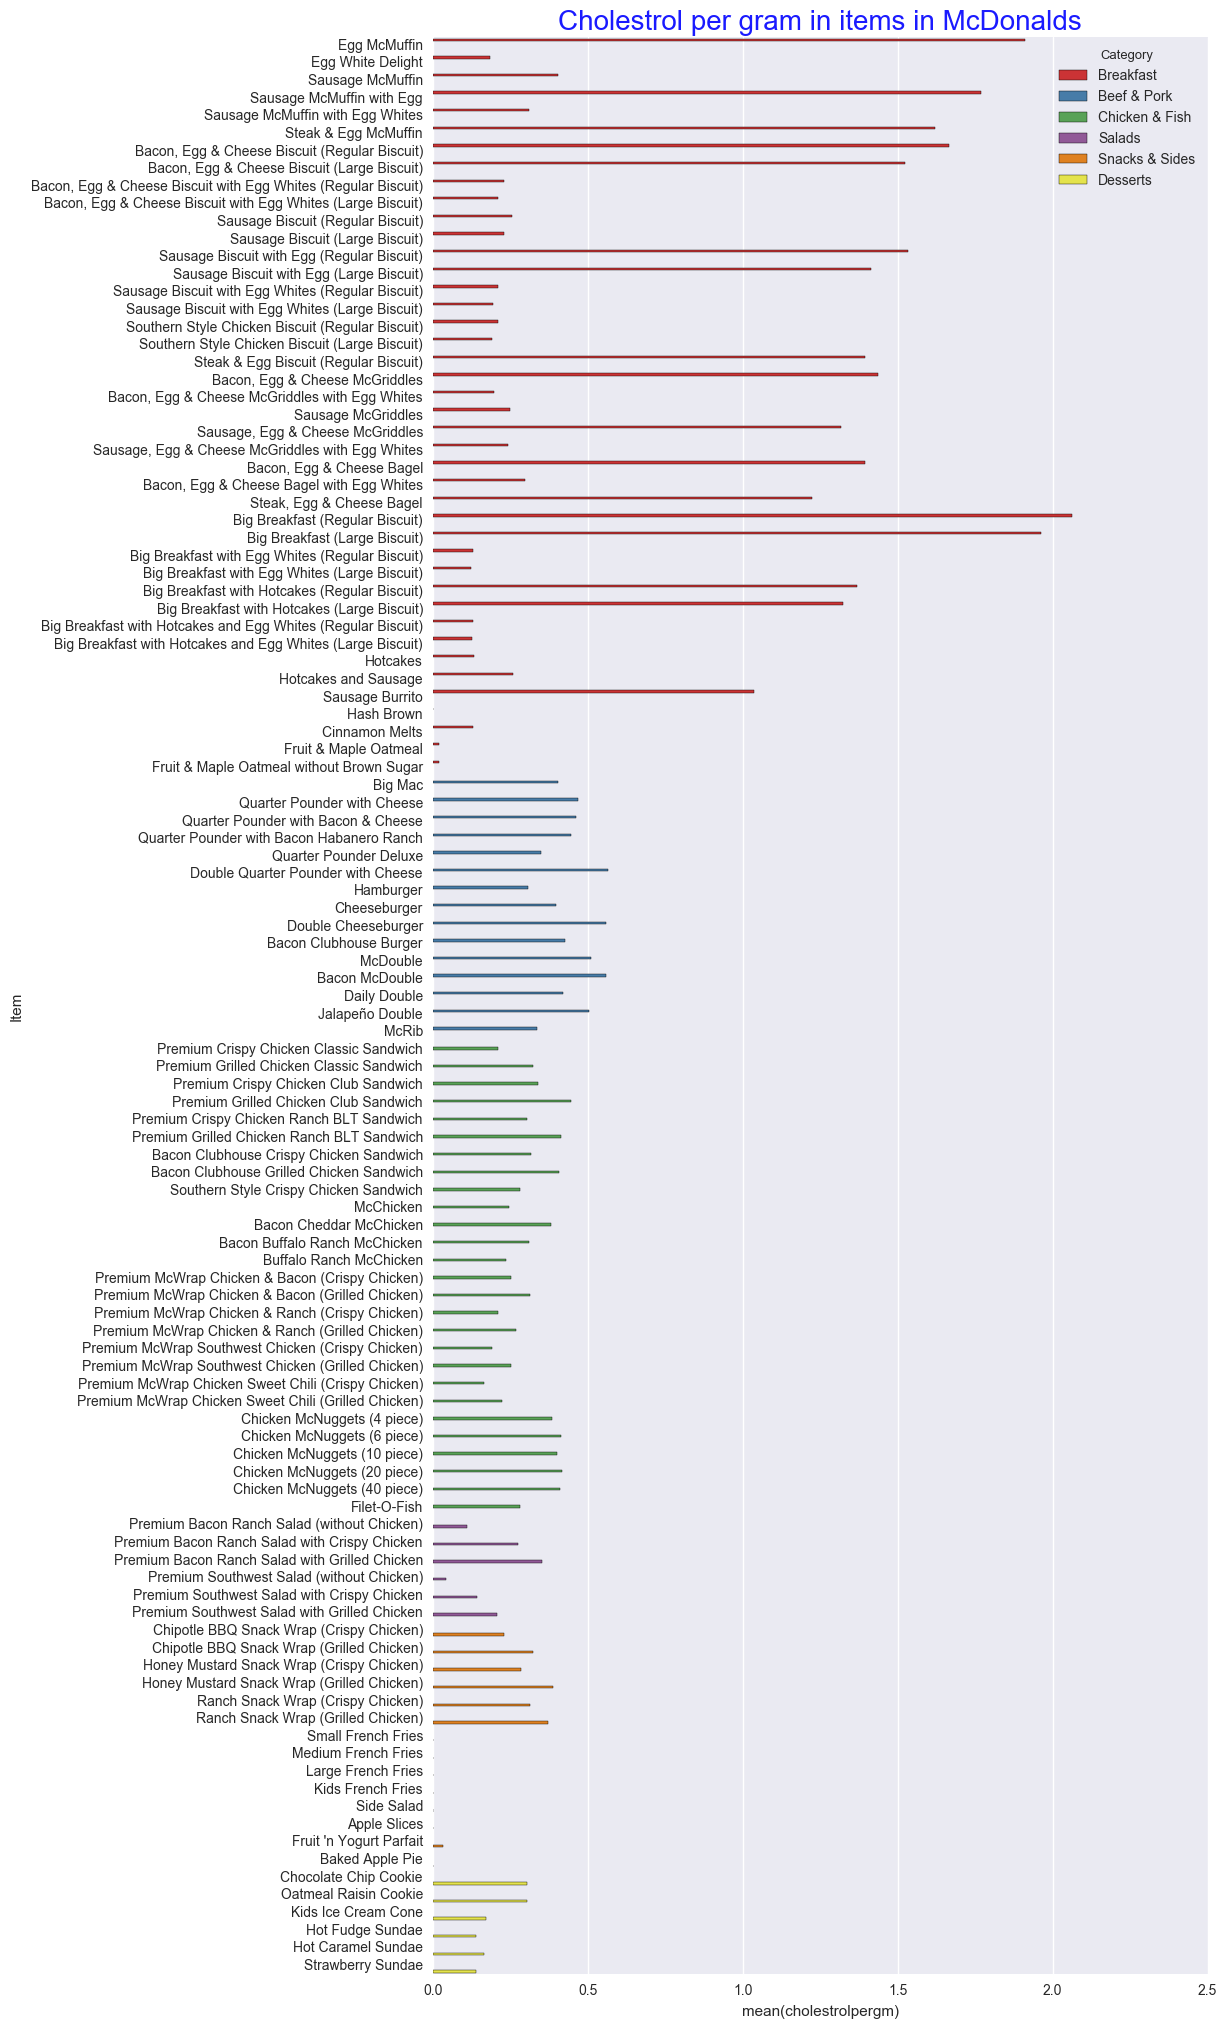

In [488]:
ax = sns.barplot(x="cholestrolpergm", 
                 y="Item", 
                 hue = 'Category',
                 data=eatsdf,                  
                 palette="Set1")
ax.figure.set_size_inches(10,25)
ax.axes.set_title('Cholestrol per gram in items in McDonalds',
    fontsize=20,color="b",alpha=0.9);

## Feature 4 --Sugar

In [489]:
eatsdf['sugarpergm'] = eatsdf['Sugars']/eatsdf['Servingsize']

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


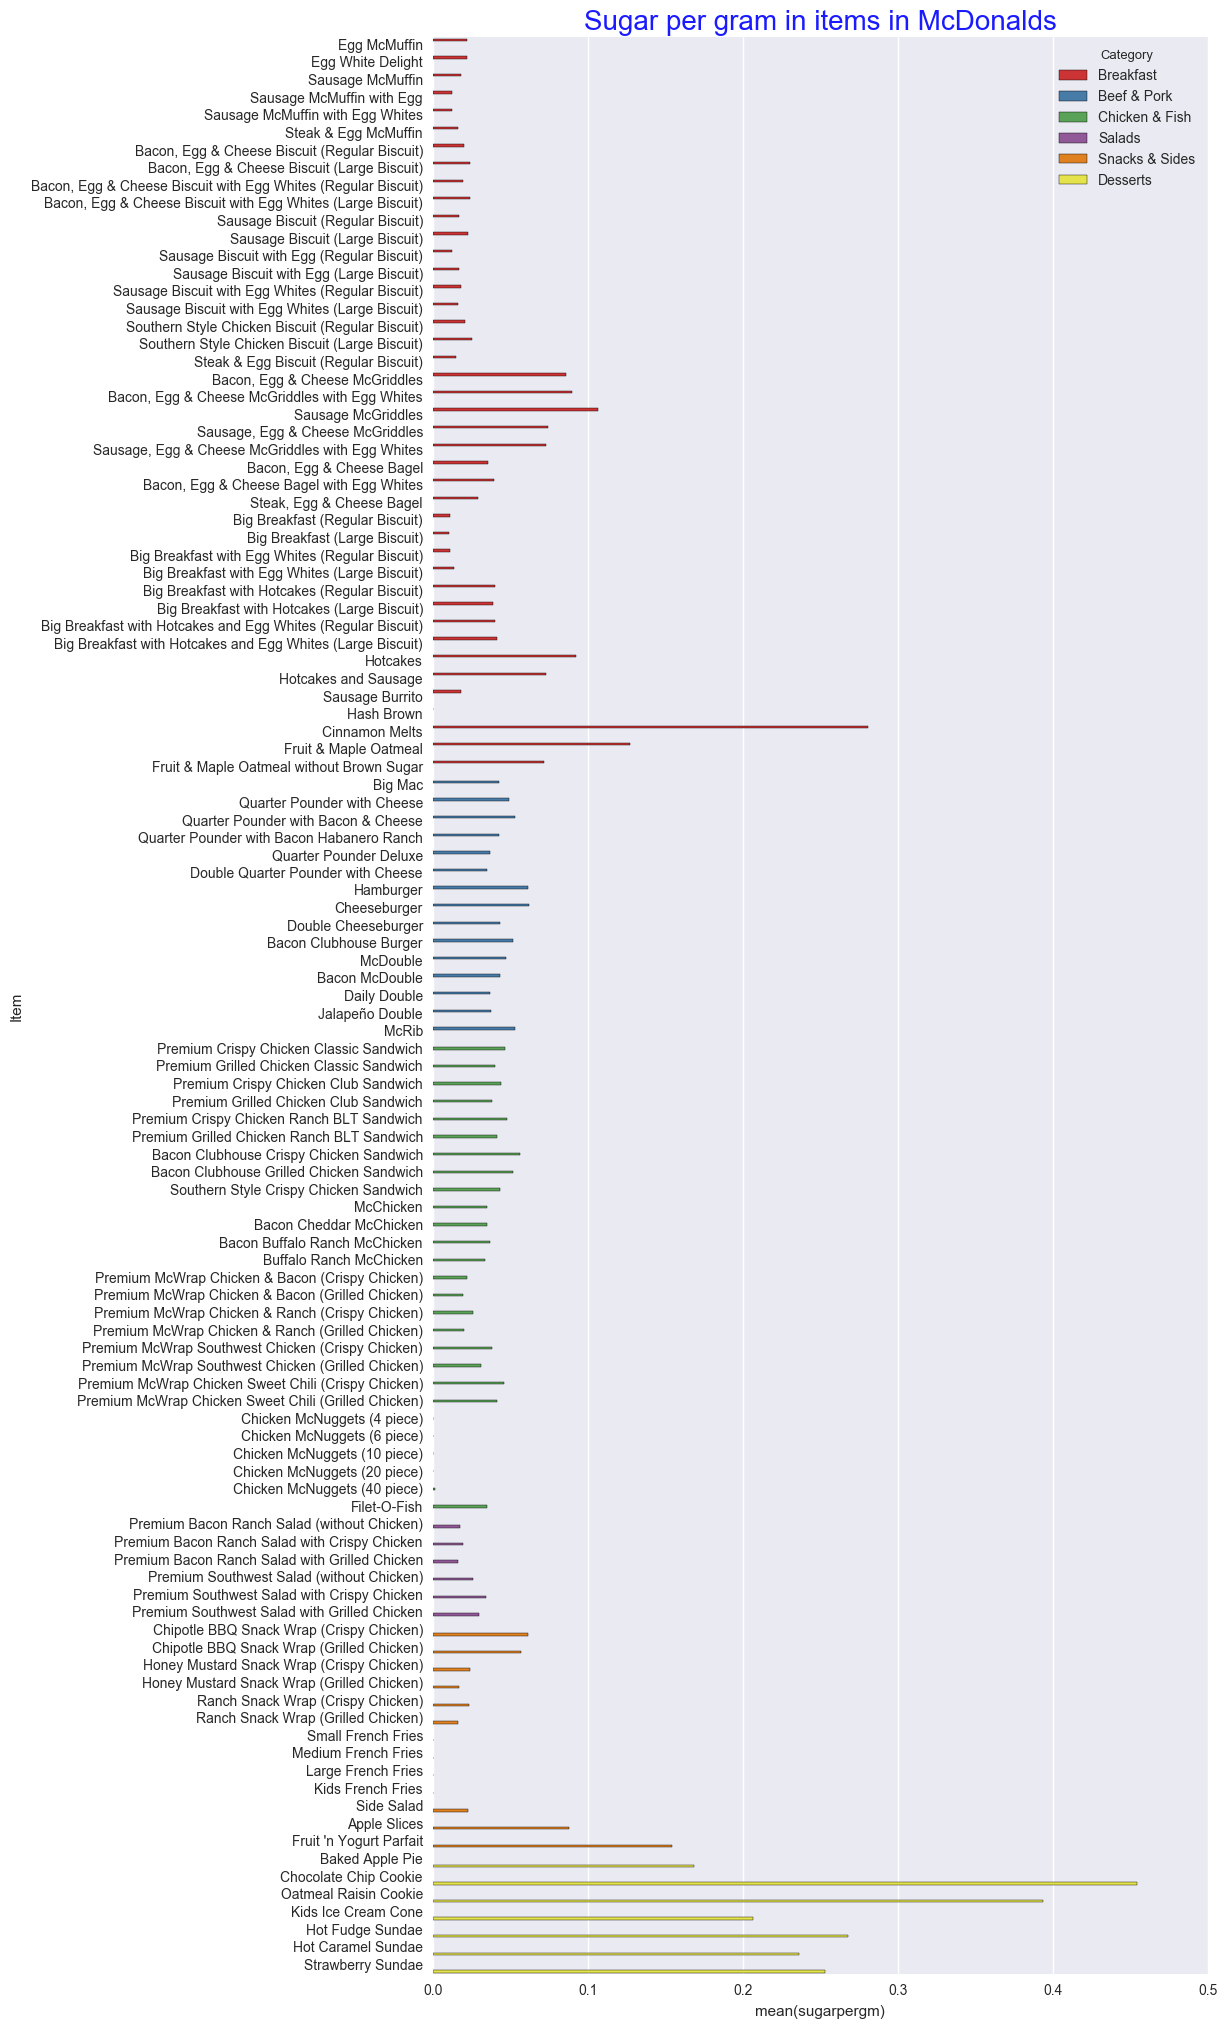

In [490]:
ax = sns.barplot(x="sugarpergm", 
                 y="Item", 
                 hue = 'Category',
                 data=eatsdf,                  
                 palette="Set1")
ax.figure.set_size_inches(10,25)
ax.axes.set_title('Sugar per gram in items in McDonalds',
    fontsize=20,color="b",alpha=0.9);

## Feature 5 -- Carbohydrates

In [491]:
eatsdf['carbohydratepergm'] = eatsdf['Carbohydrates']/eatsdf['Servingsize']

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


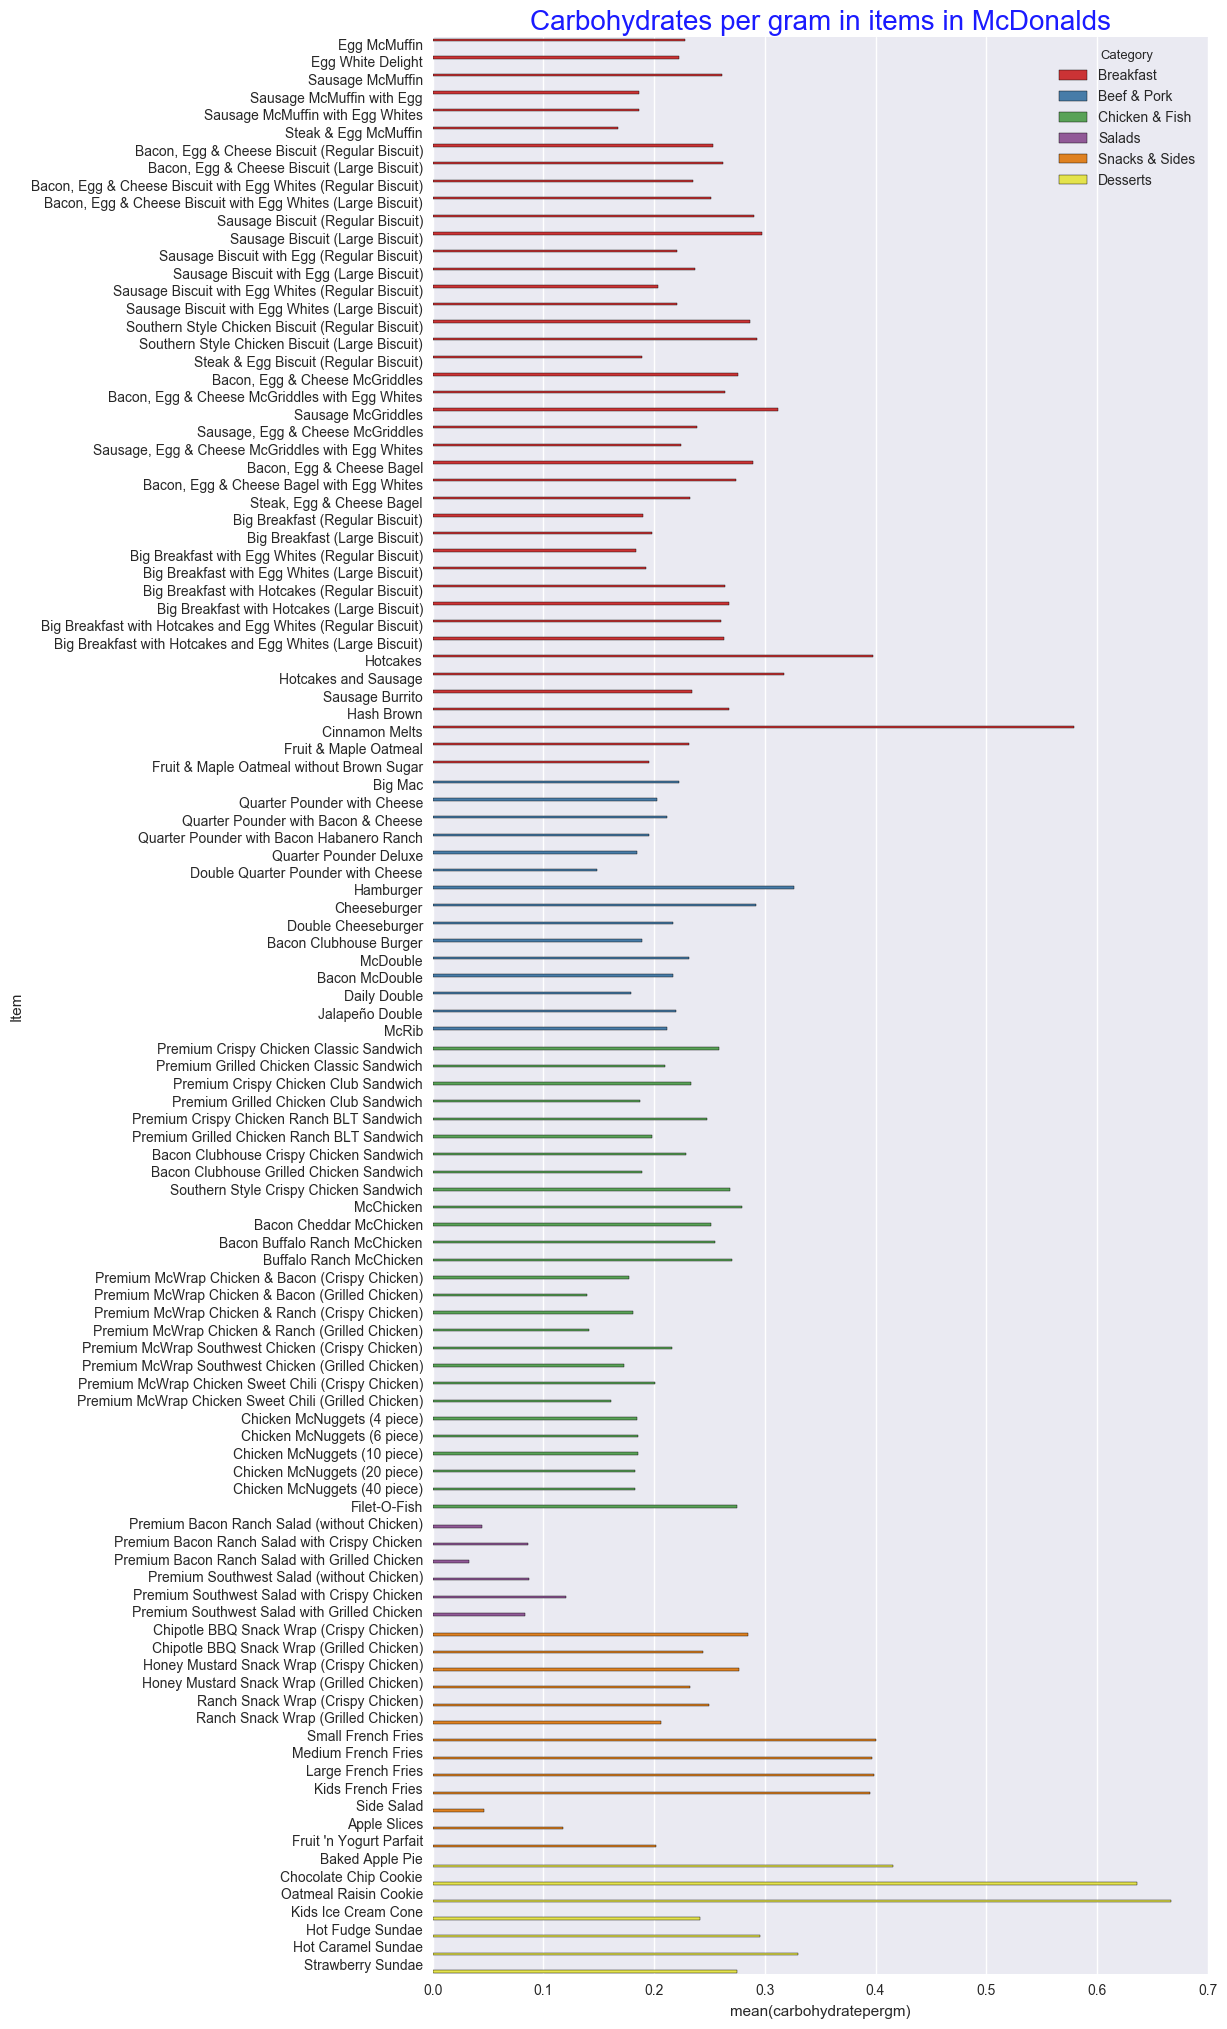

In [492]:
ax = sns.barplot(x="carbohydratepergm", 
                 y="Item", 
                 hue = 'Category',
                 data=eatsdf,                  
                 palette="Set1")
ax.figure.set_size_inches(10,25)
ax.axes.set_title('Carbohydrates per gram in items in McDonalds',
    fontsize=20,color="b",alpha=0.9);

## Feature 6-- Sodium

In [493]:
eatsdf['sodiumpergm'] = eatsdf['Sodium']/eatsdf['Servingsize']

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


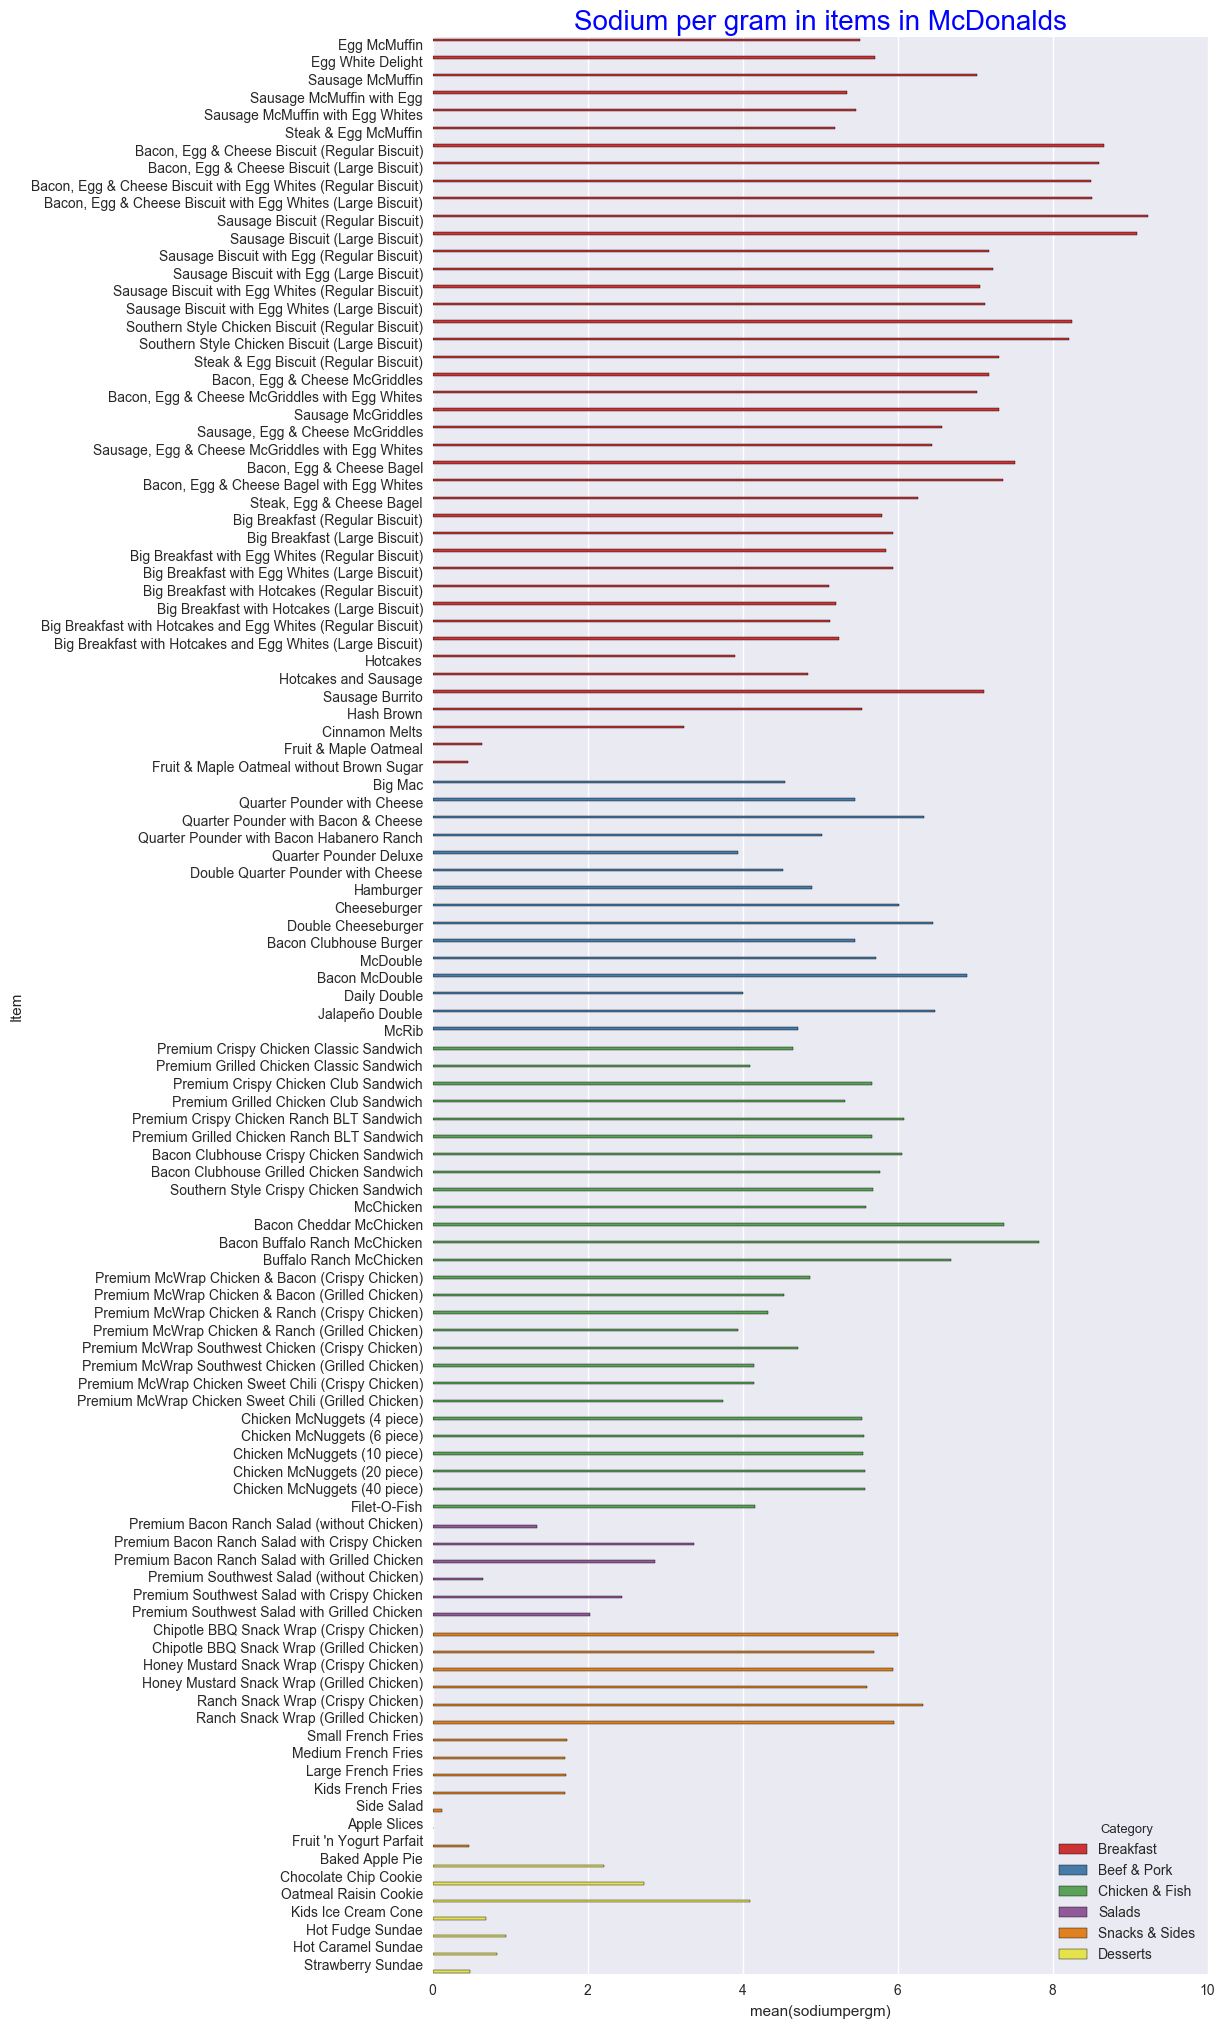

In [494]:
ax = sns.barplot(x="sodiumpergm", 
                 y="Item", 
                 hue = 'Category',
                 data=eatsdf,                  
                 palette="Set1")
ax.figure.set_size_inches(10,25)
ax.axes.set_title('Sodium per gram in items in McDonalds',
    fontsize=20,color="b",alpha=1);

## Feature 7--Protein

In [495]:
eatsdf['proteinpergm'] = eatsdf['Protein']/eatsdf['Servingsize']

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


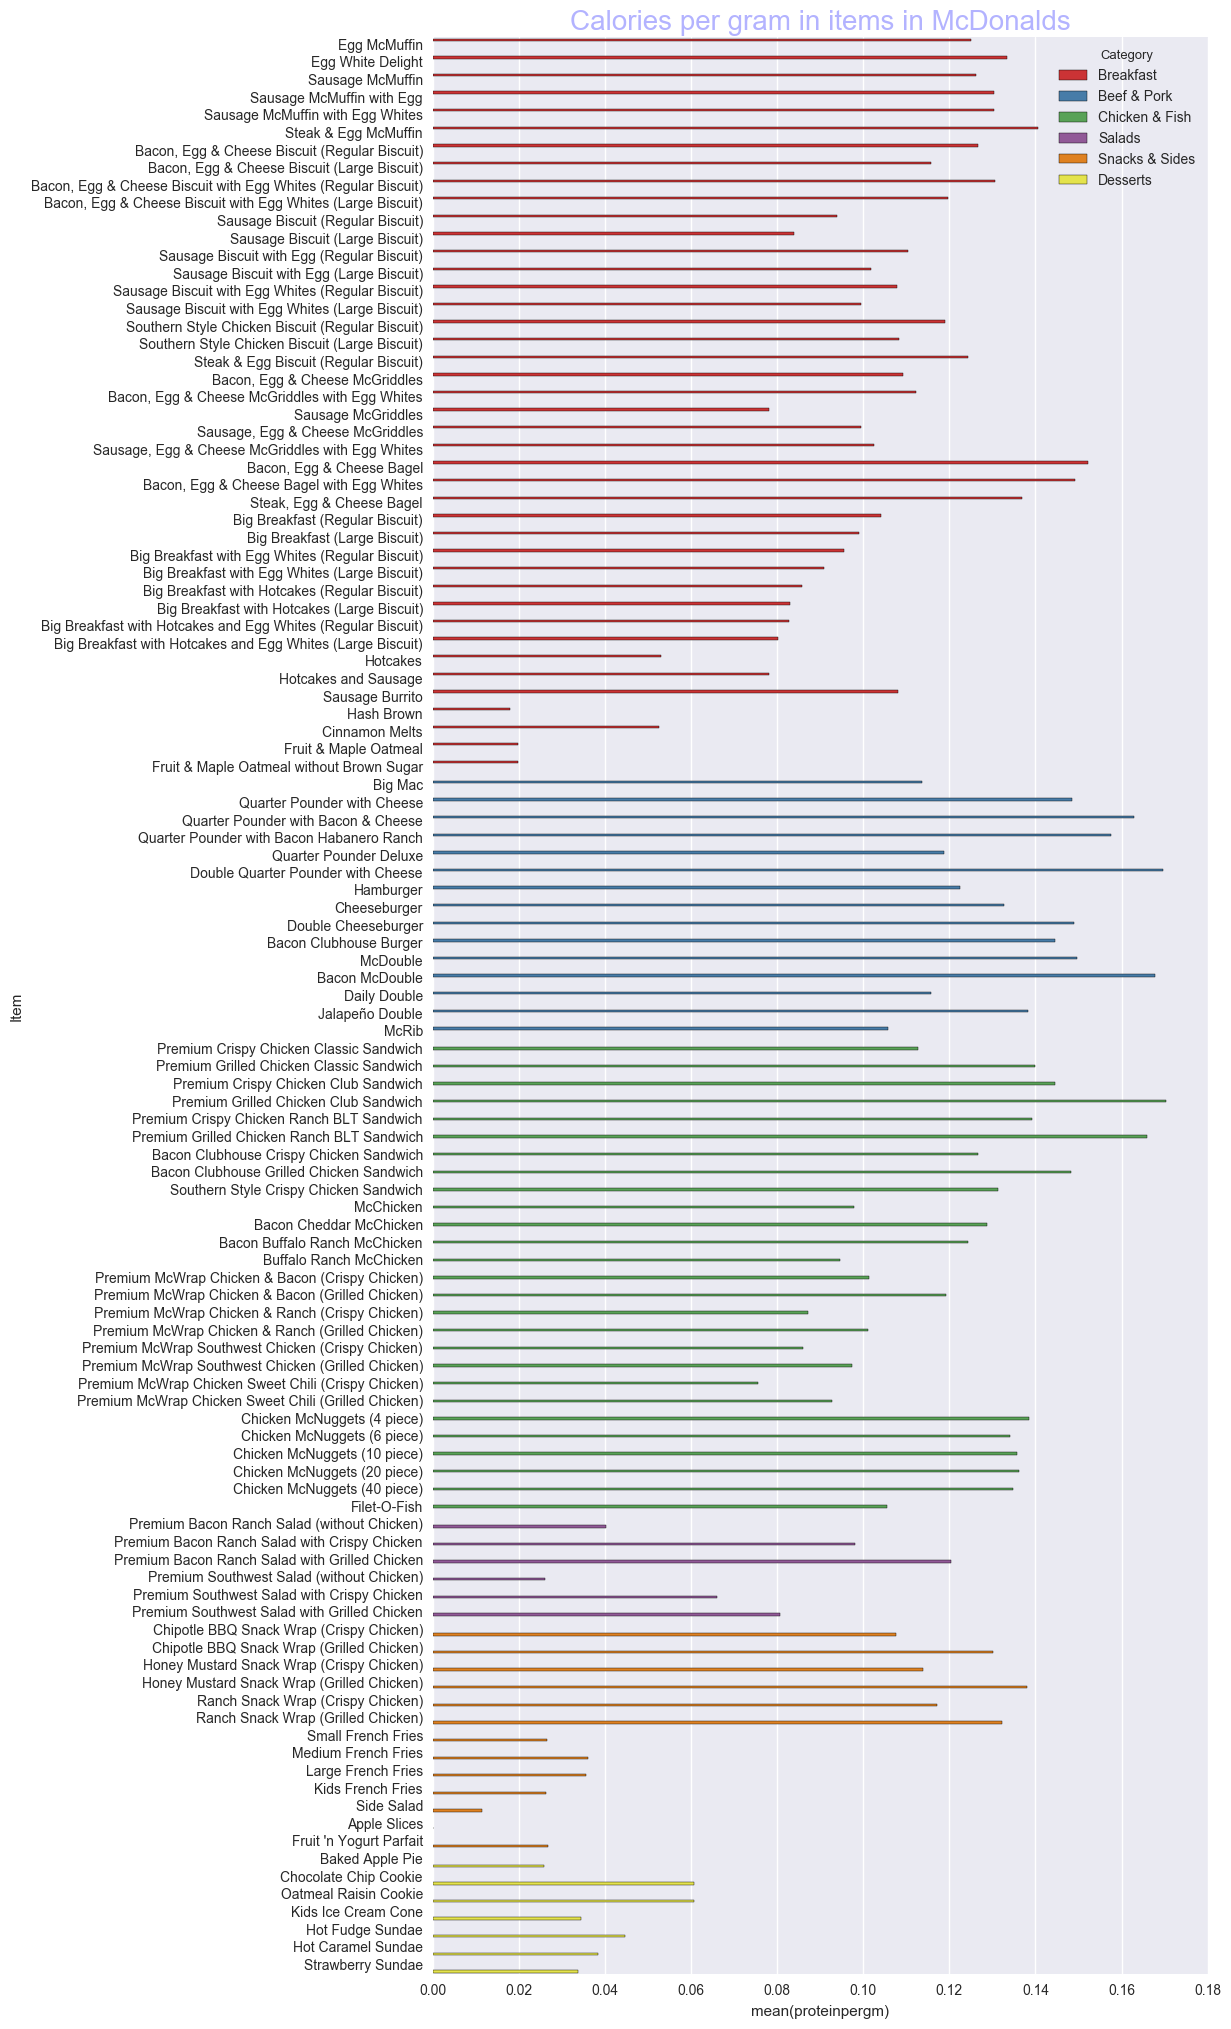

In [498]:
ax = sns.barplot(x="proteinpergm", 
                 y="Item", 
                 hue = 'Category',
                 data=eatsdf,                  
                 palette="Set1")
ax.figure.set_size_inches(10,25)
ax.axes.set_title('Calories per gram in items in McDonalds',
    fontsize=20,color="b",alpha=0.3);